In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data Preprocessing

In [4]:
#Initializing Functions

#Unique Value and Value Counts
def unique_value_count(df):
    for i in df:
        print('_'*24)
        print(df[i].value_counts())
        print(df[i].unique())
        print('='*24)
        print('')

#Null Values and Percentage
def Na(df):
    for i in df:
            print('_'*24)
            nan = df[i].isnull().sum()
            print(nan,f"- Null Values of {i}")
            print(f'The Null Percentage of {i} is {(nan/len(df))*100:.2f}%')
            print('='*24)
            print('')


In [ ]:
Na(df)
#Dataset has no Null values

________________________
0 - Null Values of Time
The Null Percentage of Time is 0.00%

________________________
0 - Null Values of V1
The Null Percentage of V1 is 0.00%

________________________
0 - Null Values of V2
The Null Percentage of V2 is 0.00%

________________________
0 - Null Values of V3
The Null Percentage of V3 is 0.00%

________________________
0 - Null Values of V4
The Null Percentage of V4 is 0.00%

________________________
0 - Null Values of V5
The Null Percentage of V5 is 0.00%

________________________
0 - Null Values of V6
The Null Percentage of V6 is 0.00%

________________________
0 - Null Values of V7
The Null Percentage of V7 is 0.00%

________________________
0 - Null Values of V8
The Null Percentage of V8 is 0.00%

________________________
0 - Null Values of V9
The Null Percentage of V9 is 0.00%

________________________
0 - Null Values of V10
The Null Percentage of V10 is 0.00%

________________________
0 - Null Values of V11
The Null Percentage of V11 is 0.0

In [6]:
df.value_counts('Class')
# we got 492 Fraud out of the Dataset
#Dataset is Highly imbalanced

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
df.shape
#Dataset has 284807 Transaction Values out of which 492 are Fraud

(284807, 31)

In [ ]:
df.info()
#Data set has all Numerical Values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [10]:
Fraud.describe()
#Average Transaction Value is 256 USD - with Maximum Fraud of 2125 USD

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [11]:
Normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


Exploratory Data Analysis and Visualization

<Axes: title={'center': 'Fraud vs Legit'}, xlabel='Class', ylabel='count'>

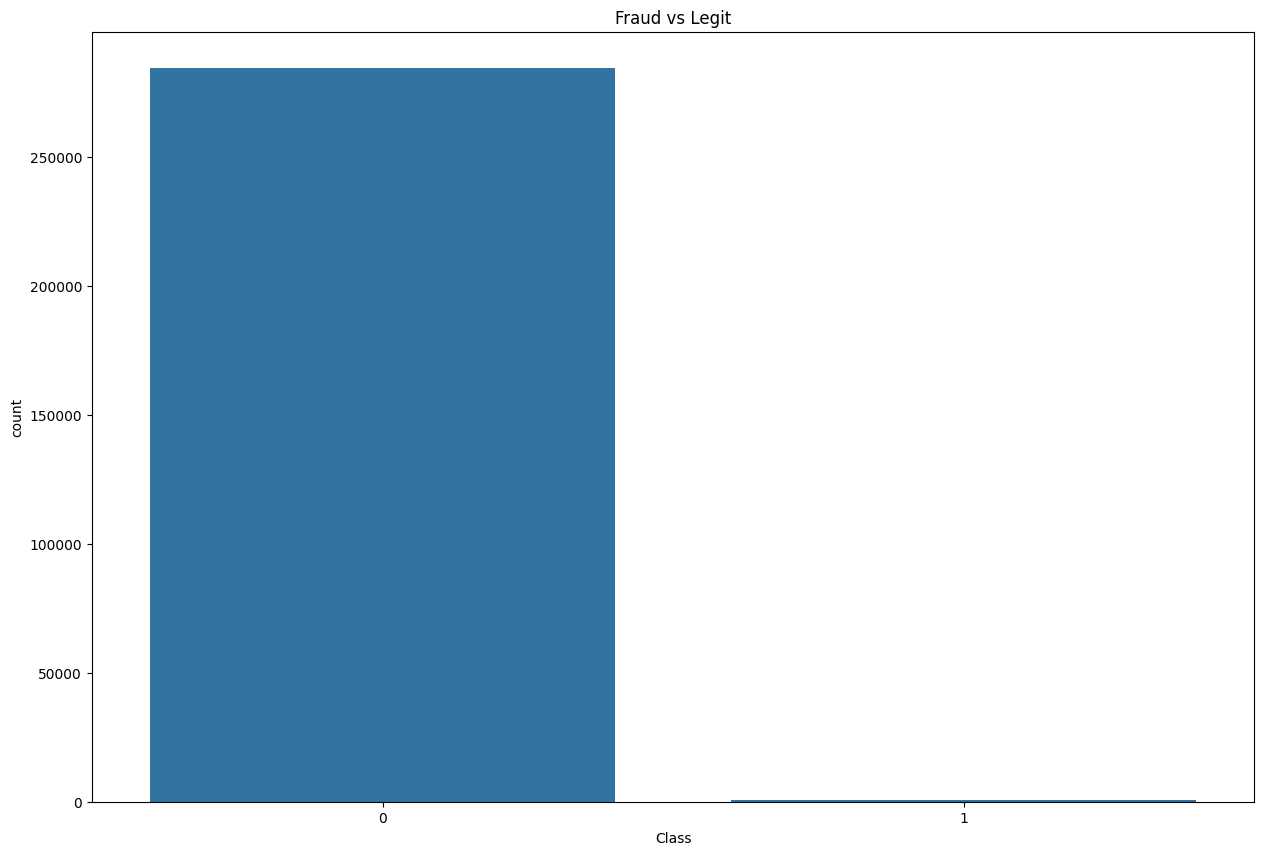

In [12]:
plt.figure(figsize=(15,10))
plt.title('Fraud vs Legit')
sns.countplot(x=df['Class'])
#Imbalance DataSet, Small Fraud +ve Data

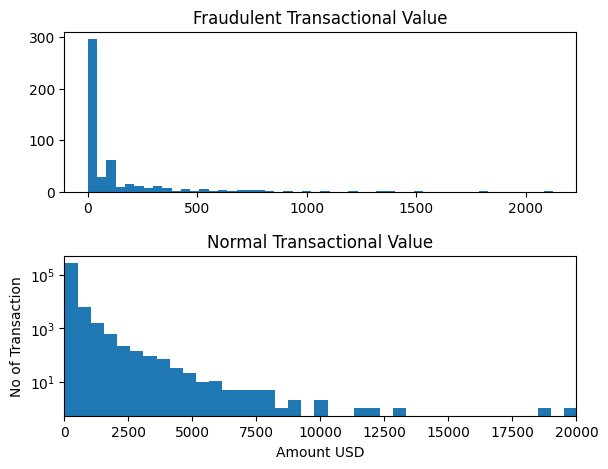

In [13]:
f, (ax1,ax2) = plt.subplots(2,1)
f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.4,hspace=0.4)
figsize = (20,15)
bins = 50
plt.xlabel('Amount USD')
plt.ylabel('No of Transaction')
ax1.hist(x=Fraud.Amount,bins=bins)
ax1.set_title('Fraudulent Transactional Value')
ax2.hist(x = Normal.Amount,bins=bins)
ax2.set_title('Normal Transactional Value')
plt.xlim((0,20000))
plt.yscale('log')

Text(0.5, 1.0, 'Normal Transactional Time')

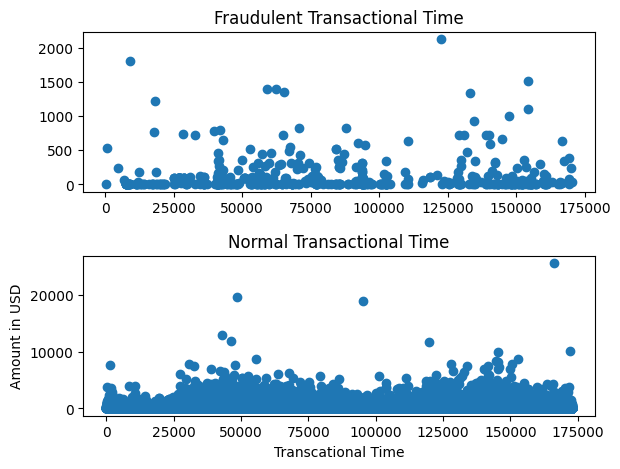

In [14]:
f, (ax1,ax2) = plt.subplots(2,1)
f.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.4,hspace=0.4)
figsize = (20,15)
bins = 50
plt.xlabel('Transcational Time')
plt.ylabel('Amount in USD')
ax1.scatter(x=Fraud.Time,y=Fraud.Amount)
ax1.set_title('Fraudulent Transactional Time')
ax2.scatter(x =Normal.Time,y= Normal.Amount)
ax2.set_title('Normal Transactional Time')

Data Modeling

In [15]:
df_model = df.sample(frac=0.1,random_state=44)

In [16]:
df_model.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243468,151944.0,1.979337,0.064521,-1.150544,1.176325,0.060850,-0.815770,0.116726,-0.135087,0.133827,...,0.306465,0.948484,0.012945,-0.002948,0.228649,-0.442275,-0.004149,-0.064232,1.00,0
199768,133128.0,-0.639667,-0.585549,1.002483,-3.320925,0.566507,-0.341409,0.267005,-0.008496,1.658995,...,0.316398,0.962796,-0.264811,0.200230,0.215350,-0.791793,-0.018760,-0.079976,51.75,0
225021,144066.0,-0.439191,1.437059,-0.703078,0.912932,1.480194,-0.252320,1.731726,-0.305094,-0.664281,...,-0.012193,0.514022,-0.215383,0.589892,0.063616,-0.447611,0.421843,0.101781,64.65,0
228573,145571.0,-6.116767,4.807263,-3.578253,0.336068,-5.019864,-0.418749,-5.557093,2.739950,-0.313728,...,3.165574,-0.077952,1.384585,0.485238,-1.660924,0.197454,-2.109592,-0.356306,2.72,0
86358,61197.0,-1.950262,-0.760342,0.654425,0.036263,1.088264,-1.491708,-0.353993,0.590658,-0.085243,...,0.235055,-0.003087,-0.151562,0.091111,-0.177509,0.360846,-0.035207,-0.200370,0.00,0


In [17]:
Fraud = df_model[df_model['Class']==1]
Normal = df_model[df_model['Class']==0]
outlier_fraction = len(Fraud)/float(len(Normal))

In [18]:
df_model.value_counts('Class')
#50 Fraud and 28431 Normal Transaction

Class
0    28431
1       50
Name: count, dtype: int64

<Axes: >

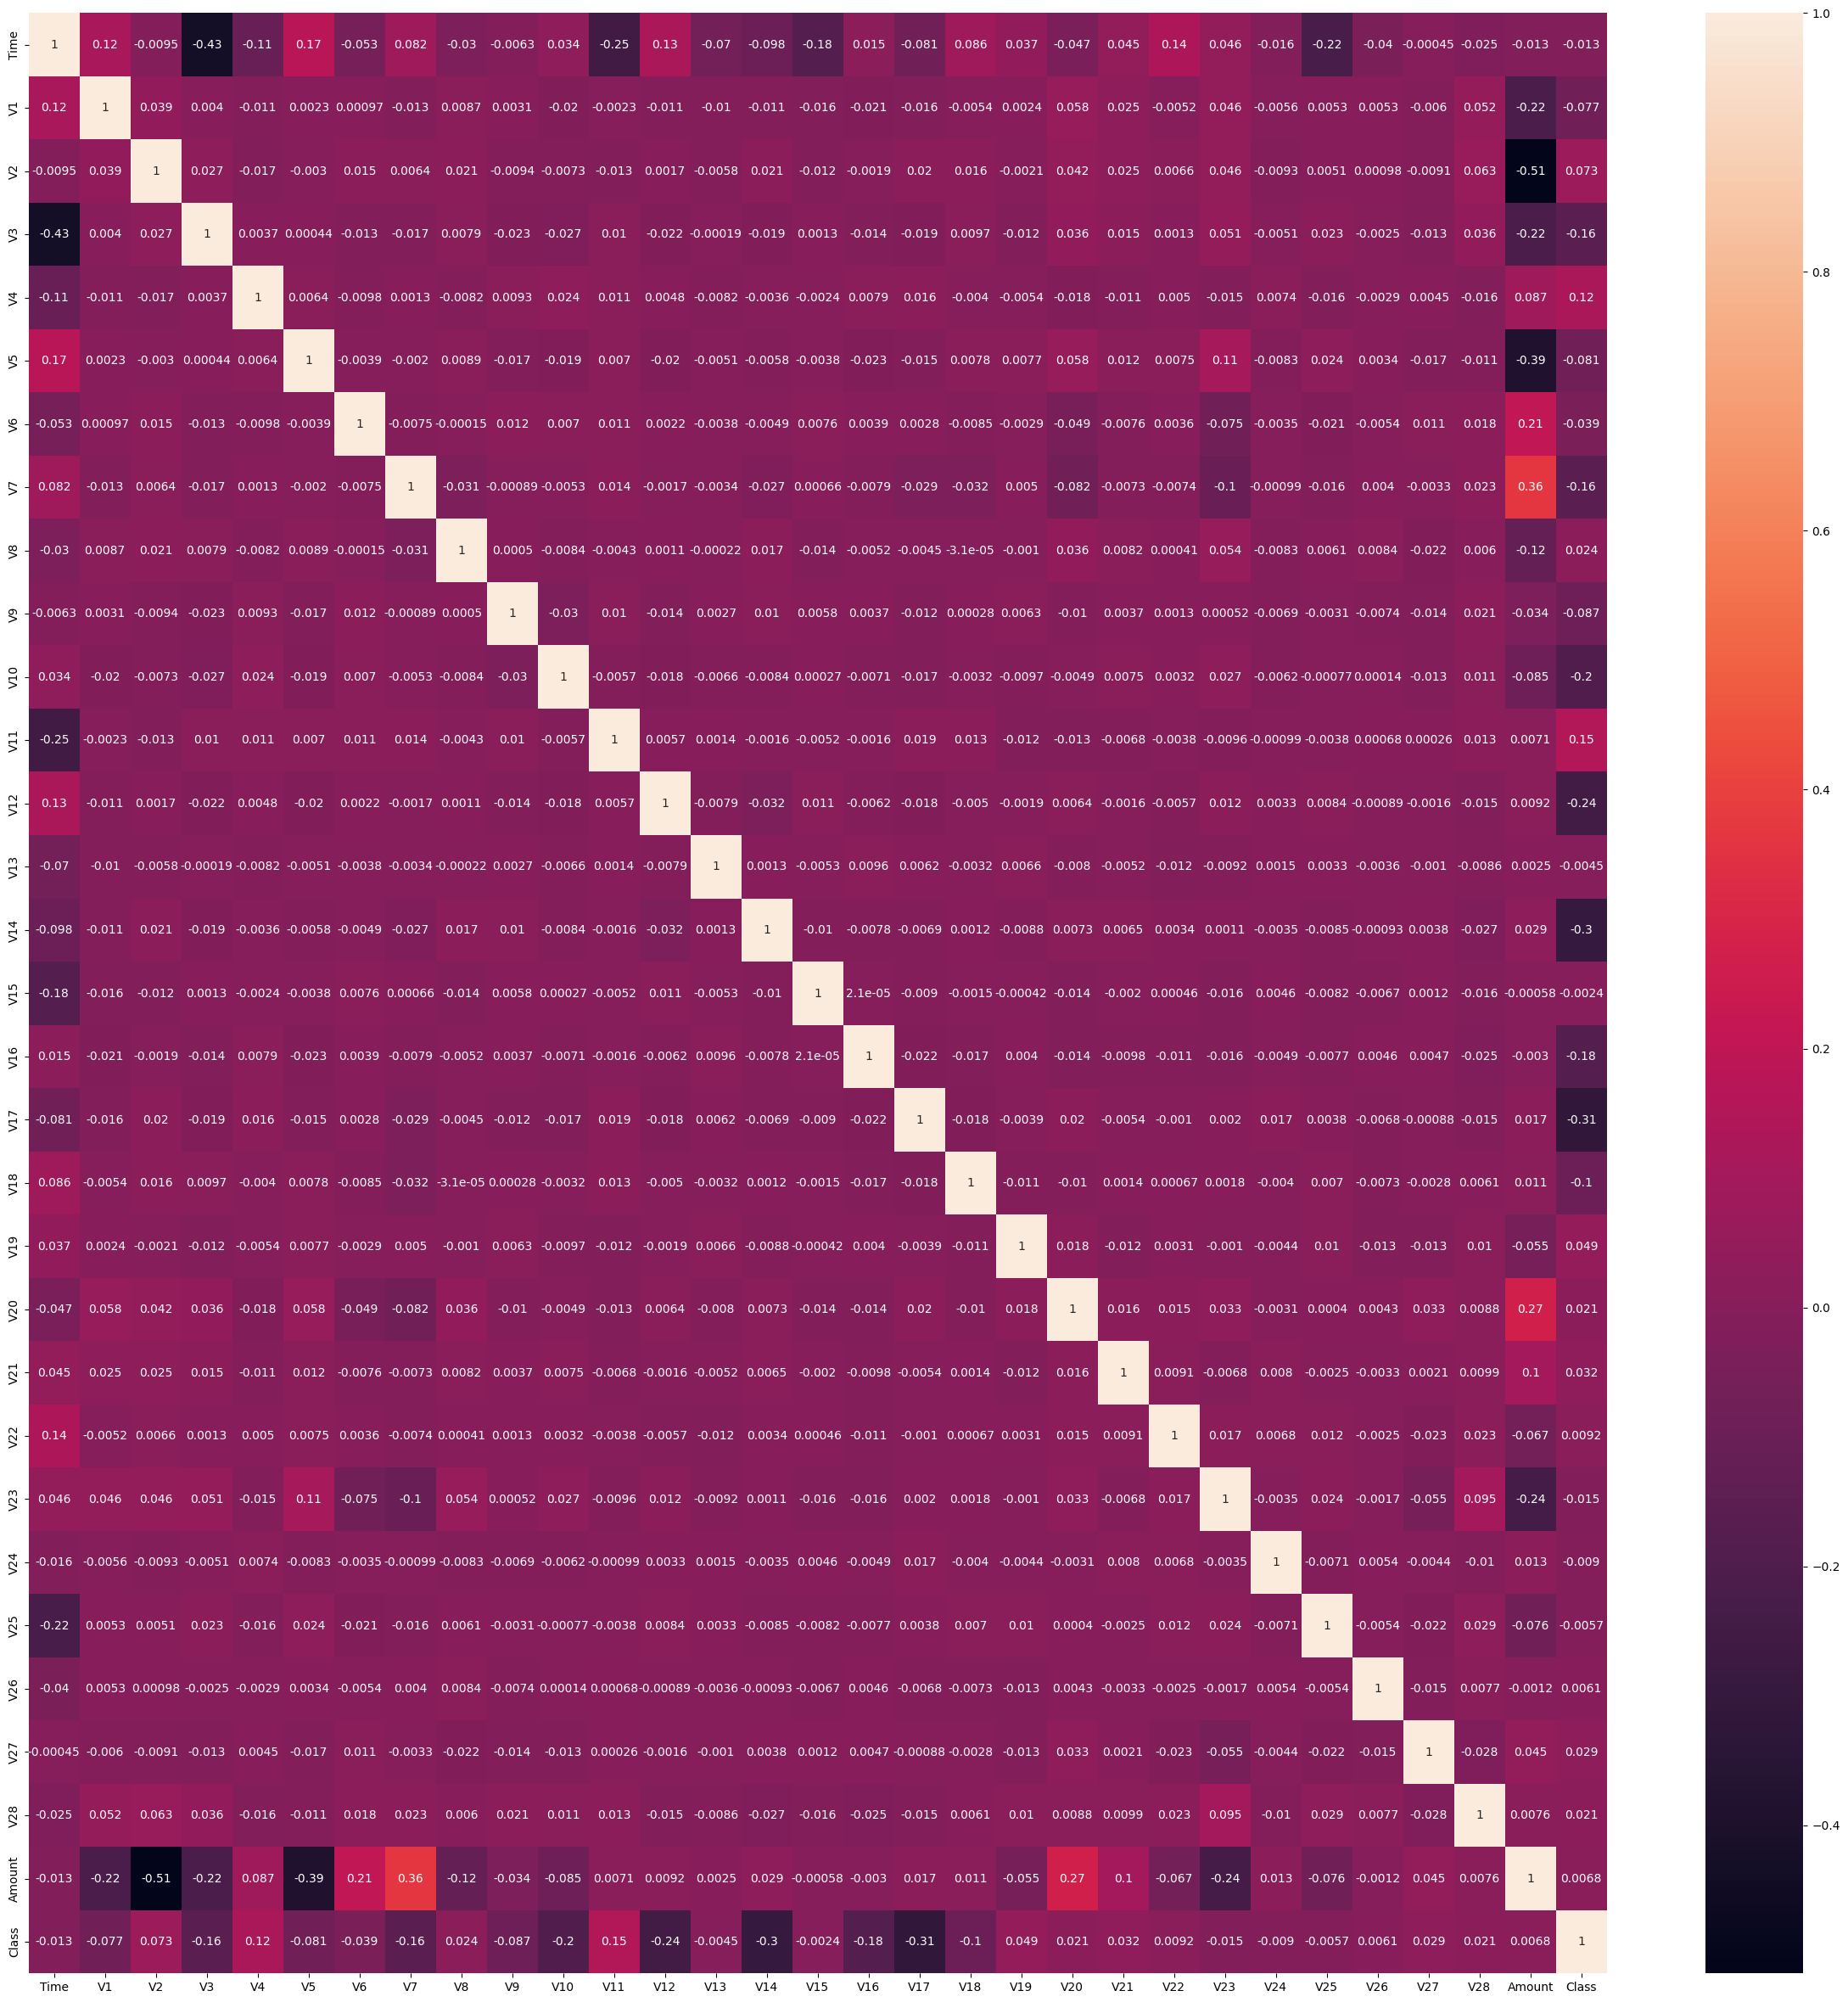

In [19]:
#Correlation
plt.figure(figsize=(30,30))
sns.heatmap(df_model.corr(),annot=True)

In [20]:
#Create Independent and Dependent Features
x = df_model.drop('Class',axis=1)
y = df_model['Class']
x.shape ,y.shape

((28481, 30), (28481,))

Model Training

In [21]:
#Importing Models
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [22]:
model = {
    'Isolation Forest':IsolationForest(),
    'Local Outlier Factor':LocalOutlierFactor()
}

In [23]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(model.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 1035
Accuracy Score :
0.9636599838488817
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     28431
           1       0.04      0.80      0.07        50

    accuracy                           0.96     28481
   macro avg       0.52      0.88      0.53     28481
weighted avg       1.00      0.96      0.98     28481

Local Outlier Factor: 3240
Accuracy Score :
0.8862399494399775
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     28431
           1       0.00      0.20      0.01        50

    accuracy                           0.89     28481
   macro avg       0.50      0.54      0.47     28481
weighted avg       1.00      0.89      0.94     28481



Hyper Paramter Tune

In [24]:
model = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(x), 
                                       contamination=outlier_fraction,random_state=55, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [25]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(model.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(x)
        scores_prediction = clf.decision_function(x)
        y_pred = clf.predict(x)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred))

Isolation Forest: 75
Accuracy Score :
0.9973666654962958
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.25      0.26      0.26        50

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 101
Accuracy Score :
0.9964537762016783
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28431
           1       0.00      0.00      0.00        50

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



#### Observations :
- Isolation Forest detected 75 errors versus Local Outlier Factor detecting 101 errors
- Isolation Forest has a 99.73% more accurate than LOF of 99.65%.
- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.
- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.